In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## cumsum

In [2]:
raw_tr = pd.read_csv(r'C:\Project\dacon-lettuce-growth\Lettuce-Growth-Environment-Prediction\data\train_input\CASE_01.csv')
raw_tr

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
0,0,00:00,25.300000,81.835000,536.016667,1.407439,0.0,0.00,0.00,0.00,0.000,0.000,0,0,0.000,0.000
1,0,01:00,25.680357,81.264286,528.696429,1.409003,126.0,126.00,0.00,0.00,0.000,0.000,0,0,0.000,0.000
2,0,02:00,25.273333,81.471666,532.833333,1.406913,0.0,126.00,0.00,0.00,0.000,0.000,0,0,0.000,0.000
3,0,03:00,25.355000,81.398334,545.566667,1.406689,126.0,252.00,0.00,0.00,0.000,0.000,0,0,0.000,0.000
4,0,04:00,25.391667,81.483333,558.583333,1.411070,0.0,252.00,0.00,0.00,0.000,0.000,0,0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,27,19:00,30.880000,82.255000,464.433333,0.000000,252.0,3638.54,18255.19,254644.43,976.332,13619.004,0,0,19231.522,268263.434
668,27,20:00,29.068333,82.506667,534.633333,0.000000,126.0,3764.54,618.82,255263.25,33.096,13652.100,0,0,651.916,268915.350
669,27,21:00,28.246667,82.835000,563.433333,0.000000,0.0,3764.54,0.00,255263.25,0.000,13652.100,0,0,0.000,268915.350
670,27,22:00,28.005000,82.850000,577.150000,0.000000,126.0,3890.54,0.00,255263.25,0.000,13652.100,0,0,0.000,268915.350


In [3]:
aug_tr = pd.read_csv(r'C:\Project\dacon-lettuce-growth\Lettuce-Growth-Environment-Prediction\data\aug_train_input\AUG_CASE_01.csv')
aug_tr

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량
0,0,0,26.229649,83.821992,528.275449,0.000000,249.674448,0.000000,924.410607,0
1,0,1,25.560197,80.185378,626.806024,1.361576,104.567602,0.000000,0.000000,0
2,0,2,26.844527,74.200624,559.422384,1.429171,0.000000,16380.459181,914.453757,0
3,0,3,26.758612,75.263971,552.134092,1.400999,0.000000,1345.963864,888.918176,0
4,0,4,26.852578,80.689116,466.419482,0.385421,109.442069,18202.611271,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
667,27,19,26.425325,74.094185,518.871278,1.374463,246.169482,98.885225,918.719205,0
668,27,20,26.593791,73.410071,526.564723,1.380240,113.020966,0.000000,903.120551,0
669,27,21,26.227887,80.066339,523.564837,1.394332,0.000000,19106.447001,945.887129,0
670,27,22,26.789091,83.304520,547.126709,1.366527,97.459190,0.000000,922.402954,0


In [4]:
raw_tr.columns

Index(['DAT', 'obs_time', '내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량',
       '일간누적분무량', '시간당백색광량', '일간누적백색광량', '시간당적색광량', '일간누적적색광량', '시간당청색광량',
       '일간누적청색광량', '시간당총광량', '일간누적총광량'],
      dtype='object')

In [5]:
aug_tr.columns

Index(['DAT', 'obs_time', '내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량',
       '시간당백색광량', '시간당적색광량', '시간당청색광량'],
      dtype='object')

In [7]:
cumsum_cols = ['일간누적분무량', '일간누적백색광량', '일간누적적색광량', '일간누적청색광량', '일간누적총광량']
sum_cols = ['시간당총광량']
target_cols = ['시간당분무량', '시간당백색광량', '시간당적색광량', '시간당청색광량']

In [18]:
# create sum_cols
aug_tr['시간당총광량'] = aug_tr['시간당백색광량'] + aug_tr['시간당적색광량'] + aug_tr['시간당청색광량']
# create cumsum_cols
for idx, col in enumerate(cumsum_cols):
    if col != '일간누적총광량':
        aug_tr[col] = aug_tr[target_cols[idx]].cumsum()
    else:
        aug_tr[col] = aug_tr['시간당총광량'].cumsum()
aug_tr

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량,시간당총광량,일간누적분무량,일간누적백색광량,일간누적적색광량,일간누적청색광량,일간누적총광량
0,0,0,26.229649,83.821992,528.275449,0.000000,249.674448,0.000000,924.410607,0,924.410607,249.674448,0.000000e+00,924.410607,0,9.244106e+02
1,0,1,25.560197,80.185378,626.806024,1.361576,104.567602,0.000000,0.000000,0,0.000000,354.242049,0.000000e+00,924.410607,0,9.244106e+02
2,0,2,26.844527,74.200624,559.422384,1.429171,0.000000,16380.459181,914.453757,0,17294.912939,354.242049,1.638046e+04,1838.864364,0,1.821932e+04
3,0,3,26.758612,75.263971,552.134092,1.400999,0.000000,1345.963864,888.918176,0,2234.882039,354.242049,1.772642e+04,2727.782540,0,2.045421e+04
4,0,4,26.852578,80.689116,466.419482,0.385421,109.442069,18202.611271,0.000000,0,18202.611271,463.684119,3.592903e+04,2727.782540,0,3.865682e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,27,19,26.425325,74.094185,518.871278,1.374463,246.169482,98.885225,918.719205,0,1017.604431,71305.462978,7.248223e+06,457399.704068,0,7.705623e+06
668,27,20,26.593791,73.410071,526.564723,1.380240,113.020966,0.000000,903.120551,0,903.120551,71418.483944,7.248223e+06,458302.824619,0,7.706526e+06
669,27,21,26.227887,80.066339,523.564837,1.394332,0.000000,19106.447001,945.887129,0,20052.334130,71418.483944,7.267330e+06,459248.711747,0,7.726578e+06
670,27,22,26.789091,83.304520,547.126709,1.366527,97.459190,0.000000,922.402954,0,922.402954,71515.943134,7.267330e+06,460171.114701,0,7.727501e+06


In [108]:
group = aug_tr.groupby(['DAT', 'obs_time'])
group

## raw & aug

In [43]:
X_raw = pd.read_csv('../data/train_input/CASE_01.csv')
X_aug = pd.read_csv('../data/aug_cumsum_train_input/AUG_CASE_01.csv')
X_raw.shape, X_aug.shape

((672, 16), (672, 16))

In [44]:
X_raw.columns, X_aug.columns

(Index(['DAT', 'obs_time', '내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량',
        '일간누적분무량', '시간당백색광량', '일간누적백색광량', '시간당적색광량', '일간누적적색광량', '시간당청색광량',
        '일간누적청색광량', '시간당총광량', '일간누적총광량'],
       dtype='object'),
 Index(['DAT', 'obs_time', '내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량',
        '시간당백색광량', '시간당적색광량', '시간당청색광량', '시간당총광량', '일간누적분무량', '일간누적백색광량',
        '일간누적적색광량', '일간누적청색광량', '일간누적총광량'],
       dtype='object'))

feature : 내부온도관측치


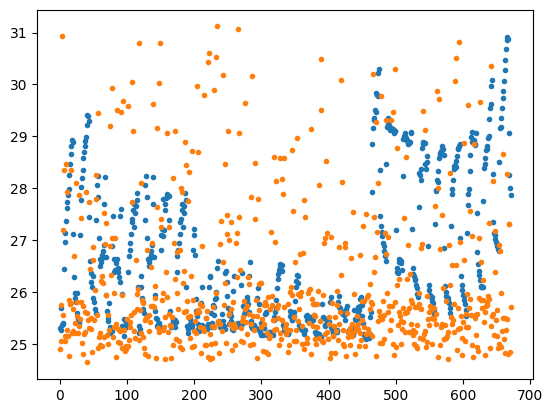

feature : 내부습도관측치


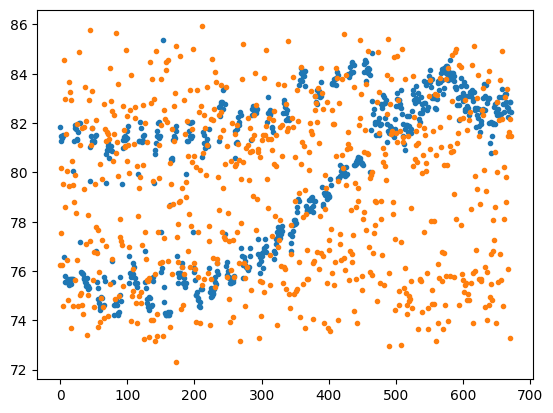

feature : co2관측치


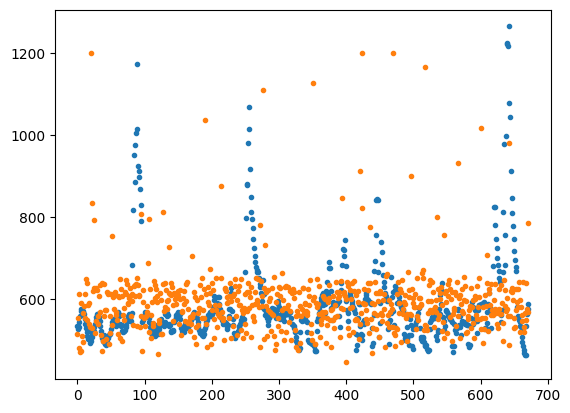

feature : ec관측치


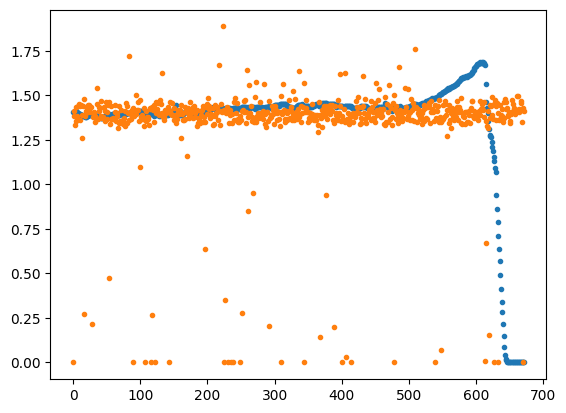

feature : 시간당분무량


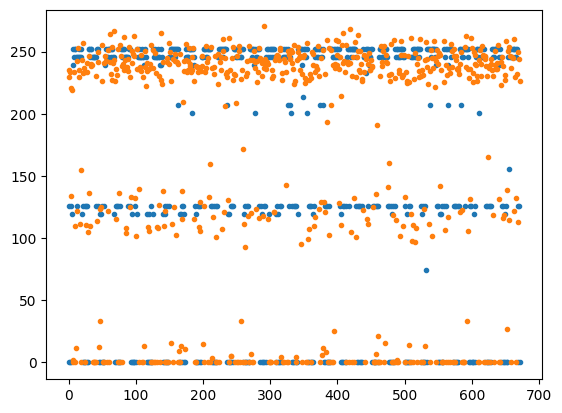

feature : 일간누적분무량


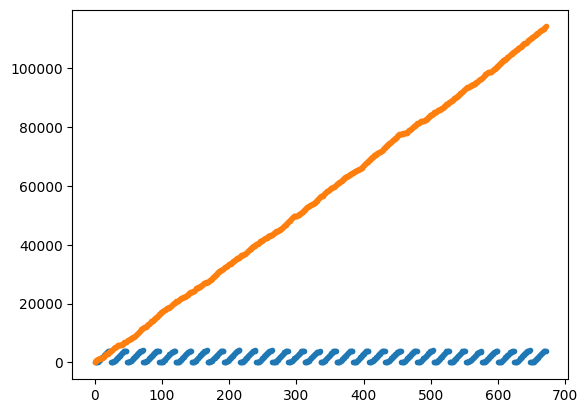

feature : 시간당백색광량


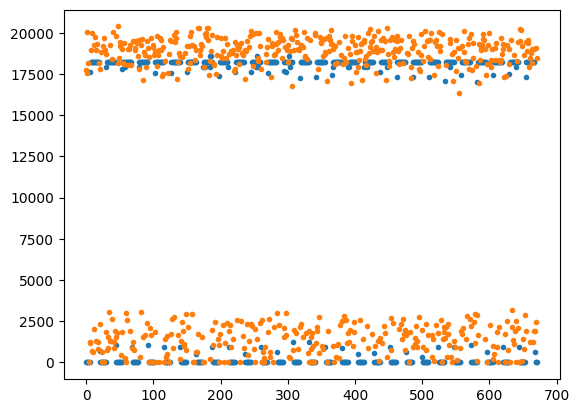

feature : 일간누적백색광량


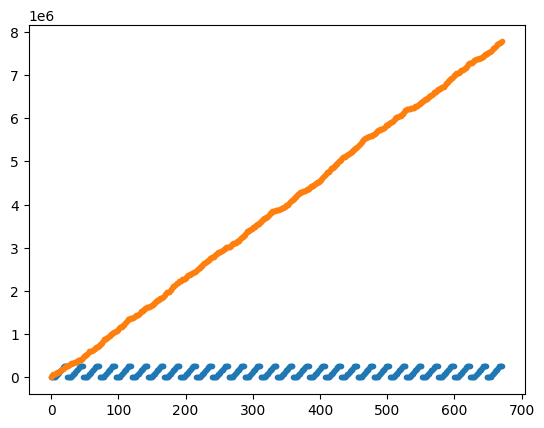

feature : 시간당적색광량


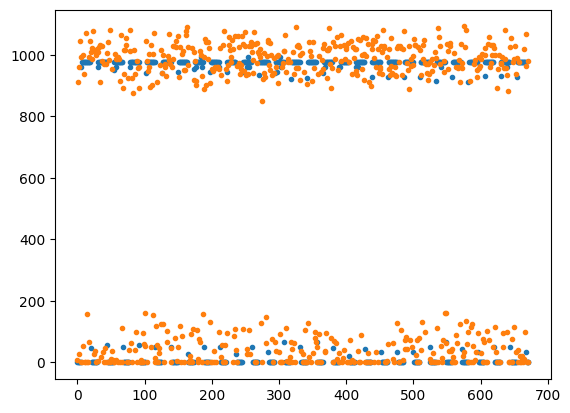

feature : 일간누적적색광량


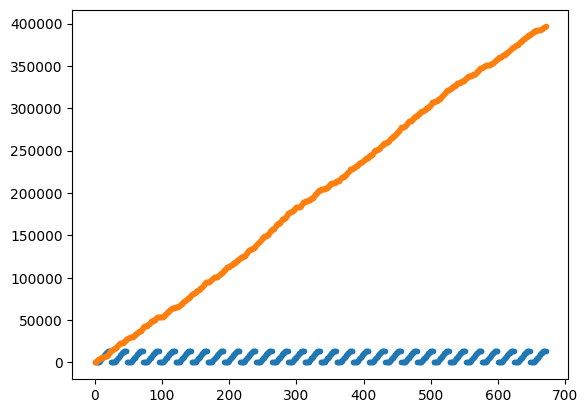

feature : 시간당청색광량


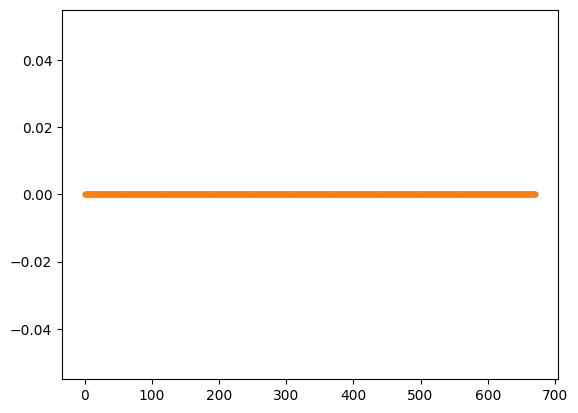

feature : 일간누적청색광량


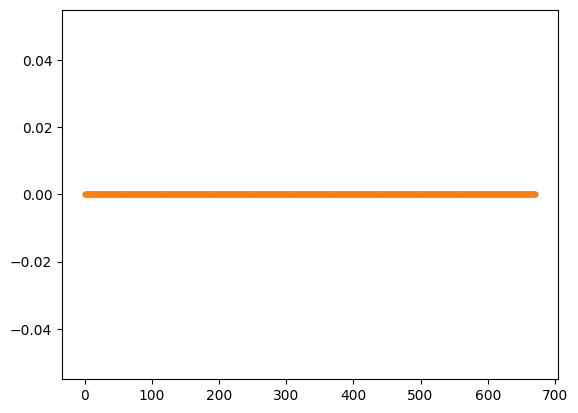

feature : 시간당총광량


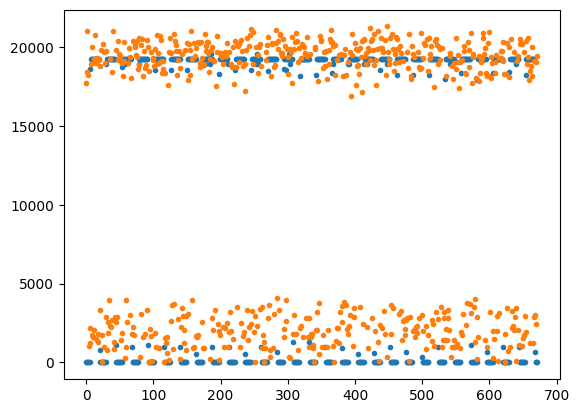

feature : 일간누적총광량


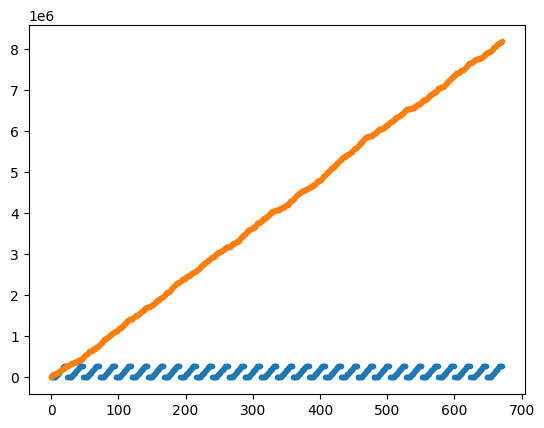

In [58]:
for col in X_raw.columns[2:]:
    print('feature :', col)
    plt.plot(X_raw[col], '.') # X_aug[col]]) #, bins=100)
    plt.plot(X_aug[col], '.')
    plt.show()

In [46]:
X_raw['일간누적총광량']
X_aug['']

0           0.000
1           0.000
2           0.000
3           0.000
4           0.000
          ...    
667    268263.434
668    268915.350
669    268915.350
670    268915.350
671    268915.350
Name: 일간누적총광량, Length: 672, dtype: float64

- check 7_fin

In [8]:
aug = pd.read_csv('../data/aug_input/train/7_fin/TRAIN0.csv')
aug.head(2)

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,시간당백색광량,시간당적색광량,시간당청색광량,시간당총광량,일간누적분무량,일간누적백색광량,일간누적적색광량,일간누적청색광량,일간누적총광량
0,0,00:00,24.183994,27.469300,33.448465,8.0,37.832798,33.253654,35.319456,29.474833,98.047943,37.832798,33.253654,35.319456,29.474833,98.047943
1,0,01:00,38.509433,89.725396,60.626664,8.0,77.925246,47.785002,42.482857,31.669165,121.937024,115.758044,81.038656,77.802313,61.143998,219.984967


In [6]:
raw = pd.read_csv('../data/train_input/CASE_01.csv')
raw.head(2)

,DAT,obs_time,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
0,0,00:00,25.300000,81.835000,536.016667,1.407439,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
1,0,01:00,25.680357,81.264286,528.696429,1.409003,126.0,126.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


In [9]:
print(aug.columns)
print(raw.columns)
print(aug.shape, raw.shape)

Index(['DAT', 'obs_time', '내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량',
       '시간당백색광량', '시간당적색광량', '시간당청색광량', '시간당총광량', '일간누적분무량', '일간누적백색광량',
       '일간누적적색광량', '일간누적청색광량', '일간누적총광량'],
      dtype='object')
Index(['DAT', 'obs_time', '내부온도관측치', '내부습도관측치', 'co2관측치', 'ec관측치', '시간당분무량',
       '일간누적분무량', '시간당백색광량', '일간누적백색광량', '시간당적색광량', '일간누적적색광량', '시간당청색광량',
       '일간누적청색광량', '시간당총광량', '일간누적총광량'],
      dtype='object')
(672, 16) (672, 16)
